## Excerise 1

## Part 1: Numerical Optimization

*In this part of the exercise we take the Rosenbrock's function and solve the optimization problem by appling a simple gradient descent algorithm for 10000 steps for n=20 with different learning rates*

## Rosenbrock's function:

$f(x) = \sum \limits _{i=1} ^{n-1} [100(x_{i+1}-x_{i}^2)^2+(x_{i}-1)^2]$


In [1]:
import numpy as np
import matplotlib.pyplot as plt

*Creating the derivative functions for all 20 variables as shown below*

In [4]:
f_derv_x1=lambda x1 , x2 : 2*(x1-1)-400*(x2-(pow(x1 ,2)))*x1
f_derv_x2to19=lambda x1 , x2 , x3 : 200*(x2-x1**2)+2*(x2-1)-400*(x3-(pow(x2 ,2)))*x2
f_derv_x20=lambda x1 , x2 : 200*(x2-x1**2)
f_rosenbrock = lambda x1 , x2 : 100*(x2-(pow(x1 ,2)))**2+(x1-1)**2

*initializing all the 20 variables with random values between 0 and 1*

In [5]:
x = [0.5,0.5,0.8,0.5,0.5,0.79,0.5,0.6,0.8,0.35,0.5,0.6,0.4,0.7,0.8,0.5,0.6,0.5,0.9,0.5 ]
x_temp =[0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0]

*Initializing the learning rate $alpha$ for the gradient descent algorithm*

In [6]:
k=20
alpha1 =[0.000002 ,0.00002 ,0.0002 ,0.0003 ,0.0004 ,0.0005 ,0.0006 ,0.0007 ,0.0008 ,0.0009 ,0.001]

*Run the function with different learning rates below and plot the results*

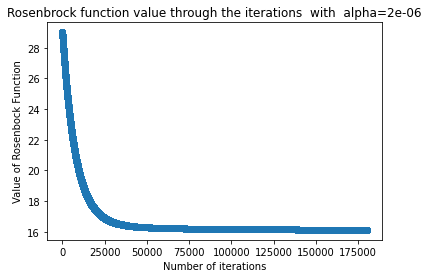

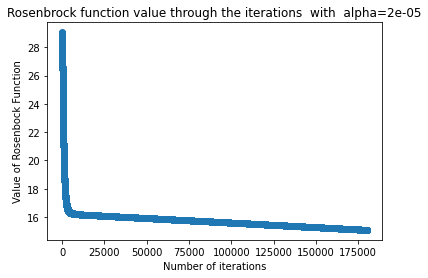

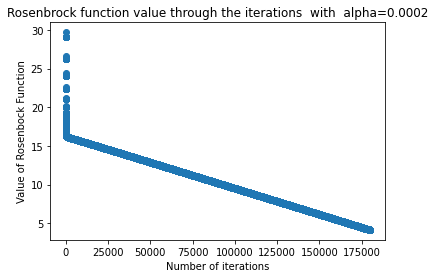

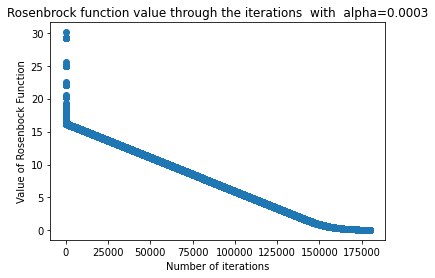

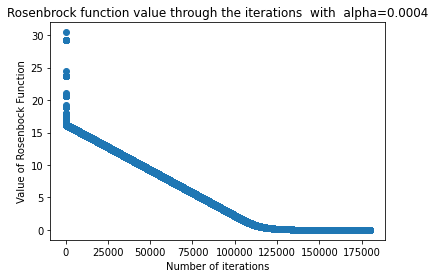

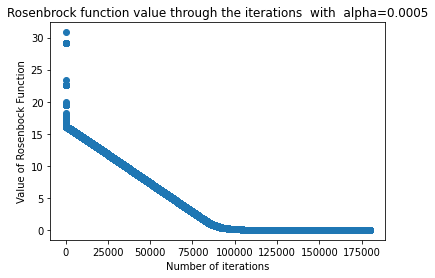

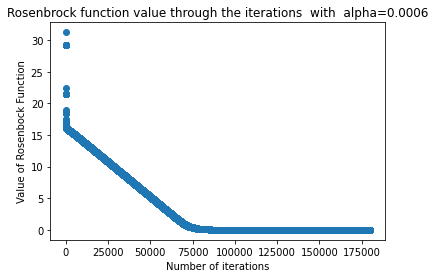

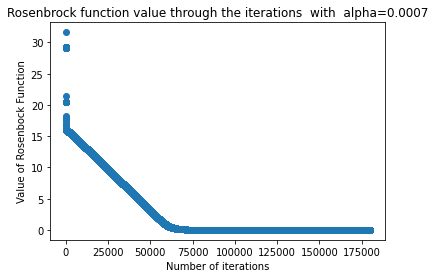

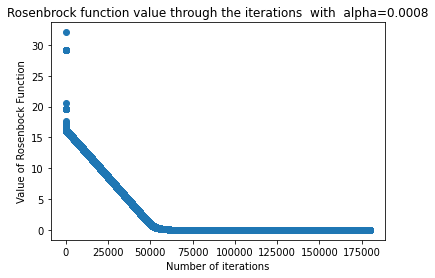

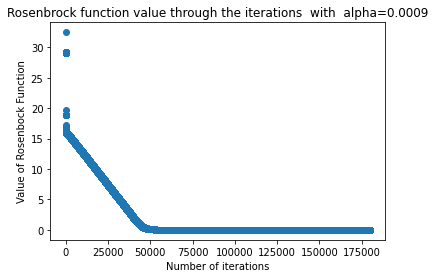

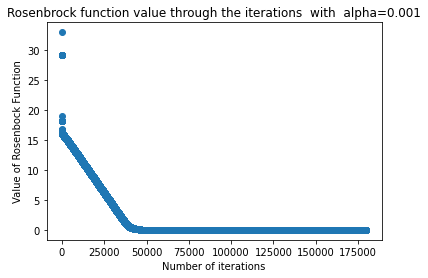

In [12]:
for alpha in alpha1 :
    x = [0.5,0.5,0.8,0.5,0.5,0.79,0.5,0.6,0.8,0.35,0.5,0.6,0.4,0.7,0.8,0.5,0.6,0.5,0.9,0.5]
    x_temp =[0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0]
    z=[]
    for n in range(10000):
        x_temp[0]=x[0]-alpha*f_derv_x1(x[0],x[1])
        for i in range (1 , k-1):
            x_temp[i]=x [i]-alpha*f_derv_x2to19(x[i-1],x[i],x[ i +1])
            x_temp[k-1]=x [k-1]-alpha*f_derv_x20(x[k-2],x [k-1])
            x=x_temp.copy()
            sum=0
            for p in range (0 , k-2):
                sum=sum+(f_rosenbrock(x[p],x[p+1]))
            z.append(sum)
    plt.plot(z , 'o')
    plt.title( "Rosenbrock function value through the iterations  with  alpha={}".format(alpha))
    plt.xlabel( "Number of iterations")
    plt.ylabel("Value of Rosenbock Function")
    plt.show()

*According to the results, as we incresead learning rate we got minimized value of rosenbrock function in less
steps. For learning rate 0.01, we got best results with all variables $x_{1}$ to $x_{19}$ tuned to approximately to 0.99, which is pretty close to the ideal value of 1. Also we got, Rosenbrock function value as 0.00000104838.*

## Part 2: Density Estimation

*In this part, we work on two datsets belonging two classes $C_{1}$ and $C_{2}$ and find the prior distribution for the datasets and calculate the biased and unbiased estimate of the conditonal distribution $p(x|C_{i})$ assuming that each class is modelled by a gaussian distribution*

In [13]:
def PriorProb(C1,C2):
    p1=C1.shape[0]/(C1.shape[0]+C2.shape[0])
    p2=C2.shape[0]/(C1.shape[0]+C2.shape[0])
    return p1,p2

In [38]:
import os
import pandas as pd
dataset1 = pd.read_fwf('densEst1.txt',header=None,names=['x','y'])
dataset2 = pd.read_fwf('densEst2.txt',header=None,names=['x','y'])

In [43]:
print("Prior probabilities of two classes are: {}".format(PriorProb(dataset1,dataset2)))

Prior probabilities of two classes are: (0.24, 0.76)


In [44]:
dataset1_x = dataset1['x']
dataset1_y = dataset1['y']
dataset2_x = dataset2['x']
dataset2_y = dataset2['y']

*Means of samples along every access is done with the function  below*

In [60]:
def Calculate_mean(samples):
    mean1=np.sum(samples)/len(samples)
    return mean1


mu11=Calculate_mean(dataset1_x)
mu12=Calculate_mean(dataset1_y)
mu21=Calculate_mean(dataset2_x)
mu22=Calculate_mean(dataset2_y)



Mean matrix for densEst 2 [[-0.705371   -0.81350762]]
Mean matrix for  densEst 1 [[3.98795211 3.98714188]]


*Unbiased covariance and biased covariance is calcualted for the datasets using the functions as shown below*

In [115]:
def calculate_covar_biased(samples1 ,samples2, mu1, mu2):
    temp2_sum=0
    temp1=0
    for i in range(1,len(samples1)):
        temp1=(samples1[i]-mu1)*(samples2[i]-mu2)
        temp2_sum=temp2_sum+temp1
    temp2_sum=temp2_sum/(len(samples1))
    return temp2_sum

def calculate_covar_unbiased(samples1, samples2, mu1, mu2) :
    temp2_sum=0
    temp1=0
    for i in range (1,len(samples1)):
        temp1=(samples1[i]-mu1)*(samples2[i]-mu2)
        temp2_sum=temp2_sum+temp1
    temp2_sum=temp2_sum/(len(samples1)-1)
    return temp2_sum

In [123]:
var11_biased=calculate_covar_biased(dataset1_x , dataset1_x , mu11, mu11)
var12_biased=calculate_covar_biased(dataset1_x , dataset1_y , mu11, mu12)
var13_biased=calculate_covar_biased(dataset1_y , dataset1_x , mu12, mu11)
var14_biased=calculate_covar_biased(dataset1_y , dataset1_y , mu12, mu12)

print(var11_biased)
print(var12_biased)
print(var13_biased)
print(var14_biased)


8.982360216748628
2.6625112580304644
2.6625112580304644
3.5734530802785165


In [124]:


var21_biased=calculate_covar_biased(dataset2_x , dataset2_x , mu21, mu21)
var22_biased=calculate_covar_biased(dataset2_x , dataset2_y , mu21, mu22)
var23_biased=calculate_covar_biased(dataset2_y , dataset2_x , mu22, mu21)
var24_biased=calculate_covar_biased(dataset2_y , dataset2_y , mu22, mu22)

var11=calculate_covar_unbiased(dataset1_x , dataset1_x , mu11,mu11)
var12=calculate_covar_unbiased(dataset1_x , dataset1_y , mu11,mu12)
var13=calculate_covar_unbiased(dataset1_y , dataset1_x , mu12,mu11)
var14=calculate_covar_unbiased(dataset1_y , dataset1_y , mu12,mu12)

var21=calculate_covar_unbiased(dataset2_x , dataset2_x , mu21,mu21)
var22=calculate_covar_unbiased(dataset2_x , dataset2_y , mu21,mu22)
var23=calculate_covar_unbiased(dataset2_y , dataset2_x , mu22,mu21)
var24=calculate_covar_unbiased(dataset2_y , dataset2_y , mu22,mu22)
mean1=np.matrix([mu11,mu12])
print("Mean matrix for densEst 2",mean1)
mean2=np.matrix([mu21,mu22])
print("Mean matrix for  densEst 1" ,mean2)

Mean matrix for densEst 2 [[-0.705371   -0.81350762]]
Mean matrix for  densEst 1 [[3.98795211 3.98714188]]


In [125]:
co_var_matrix11=np.matrix([[var11_biased,var12_biased],[var13_biased,var14_biased]])
print("Covariance  Matrix for  densEst2(biased)\n" , co_var_matrix11)
co_var_matrix22=np.matrix([[var21_biased,var22_biased],[var23_biased,var24_biased]])
print ( "Covariance  Matrix  for densEst 1(biased)\n", co_var_matrix22 )
co_var_matrix1=np.matrix([[var11,var12] ,[var13,var14]])
print ( "Covariance  Matrix  for densEst2( unbiased )\n" , co_var_matrix1)
co_var_matrix2=np.matrix([[var21,var22],[var23,var24]])
print ("Covariance Matrix for densEst1(unbiased)\n",co_var_matrix2)

Covariance  Matrix for  densEst2(biased)
 [[8.98236022 2.66251126]
 [2.66251126 3.57345308]]
Covariance  Matrix  for densEst 1(biased)
 [[4.17527846 0.02249429]
 [0.02249429 2.75049647]]
Covariance  Matrix  for densEst2( unbiased )
 [[9.01994331 2.67365147]
 [2.67365147 3.58840477]]
Covariance Matrix for densEst1(unbiased)
 [[4.18077948 0.02252392]
 [0.02252392 2.75412032]]


## Class Density

*The datasets are plotted as below*

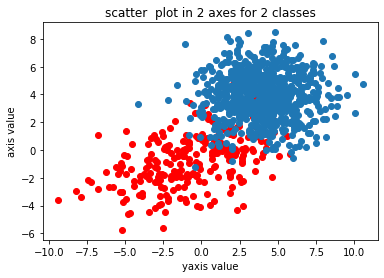

In [127]:
dataset1_x =[]
dataset1_y =[]
dataset2_x =[]
dataset2_y =[]
for i in range(len(dataset1)):
    dataset1_x.append(dataset1['x'][i])
    dataset1_y.append(dataset1['y'][i])
for i in range(len(dataset2)):
    dataset2_x.append(dataset2['x'][i])
    dataset2_y.append(dataset2['y'][i])
plt.plot(dataset1_x, dataset1_y,'o' ,color= 'red')
plt.plot(dataset2_x , dataset2_y , 'o' )
plt.title("scatter  plot in 2 axes for 2 classes")
plt.xlabel("yaxis value" )
plt.ylabel("axis value" )
plt.show()

*2d Guassian distribution are fitted to each class of dataset with mean and unbiased co-variance matrix using the below function and plotted using the contour function*

In [128]:
def mul_gauss( pos , mu, Sigma ):
    N = np.sqrt((2*np.pi)**2 * np.linalg.det(Sigma))
    expo = np.einsum('...j,jk,...k->...',pos-mu,np.linalg.inv(Sigma),pos-mu)
    return np.exp(-expo/2) / N

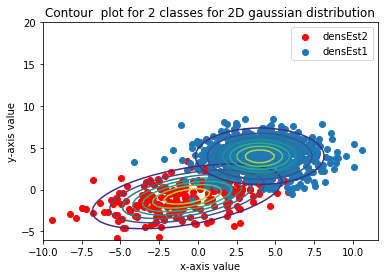

In [129]:
X = np.linspace(-10,10,60)
Y = np.linspace(-6,20,60)
X ,Y = np.meshgrid(X,Y)
mu1 = np.array([mu11, mu12])
Sigma1 = np.array([[ var11 , var12 ] , [ var13 , var14 ]])
mu2 = np.array([mu21, mu22])
Sigma2 = np.array([[ var21 , var22 ] , [ var23 , var24 ]])
pos = np.empty(X.shape+(2,))
pos[:,:,0] = X
pos[:,:,1] = Y
Z1 = mul_gauss(pos,mu1,Sigma1)
Z2 = mul_gauss(pos,mu2,Sigma2)
fig = plt.figure()
plt.contour(X,Y,Z1)
plt.scatter(dataset1_x,dataset1_y,color='r' , label='densEst2')
plt.contour(X,Y,Z2)
plt.scatter(dataset2_x , dataset2_y , label= 'densEst1' )
plt.title("Contour  plot for 2 classes for 2D gaussian distribution" )
plt.xlabel("x-axis value")
plt.ylabel("y-axis value")
plt.legend()
plt.show()

## Posterior

*By using the prior probabilities we calculate the posterior for densEst1 and densEst2 functions*

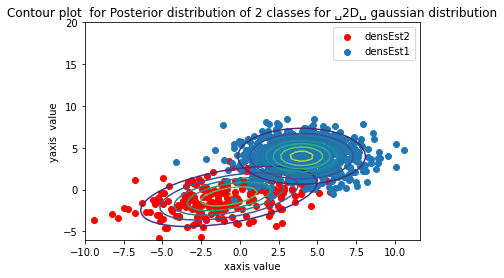

In [132]:
Z1 = mul_gauss(pos,mu1,Sigma1)*0.76
Z2 = mul_gauss(pos,mu2,Sigma2)*0.24
fig = plt.figure()
plt.contour(X,Y,Z1)
plt.scatter( dataset1_x , dataset1_y, color= 'r', label= 'densEst2')
plt.contour(X , Y , Z2)
plt.scatter(dataset2_x, dataset2_y, label= 'densEst1')
plt.title("Contour plot  for Posterior distribution of 2 classes for ␣2D␣ gaussian distribution") 
plt.xlabel("xaxis value" )
plt.ylabel( "yaxis  value")
plt.legend()
plt.show()

## Non-Parametric Density Estimation

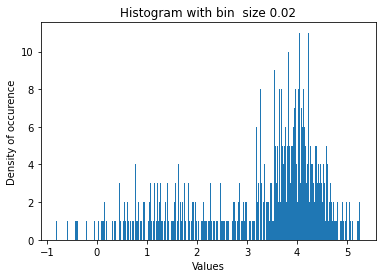

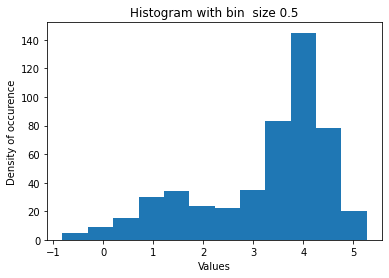

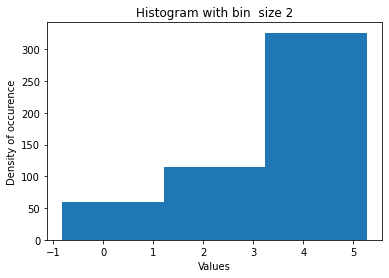

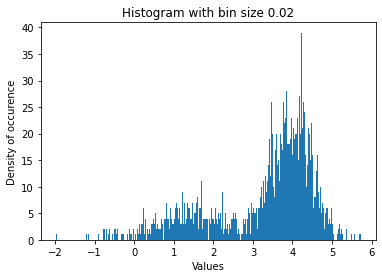

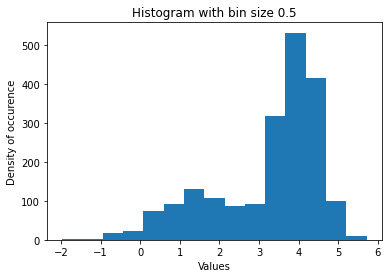

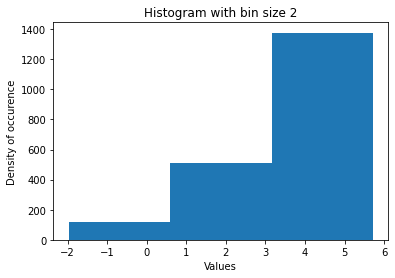

In [6]:
import numpy as np
import matplotlib.pyplot as plt
array_from_file=  np.loadtxt("nonParamTrain.txt" ,dtype=float)
bin_size =[0.02 ,0.5 ,2]

for i in bin_size:
    no_bins=int((max(array_from_file)-min(array_from_file))/i)
    plt.hist(array_from_file,bins=no_bins)
    plt.title("Histogram with bin  size {}".format(i))
    plt.xlabel("Values")
    plt.ylabel("Density of occurence")
    plt.show()


array_from_file = np.loadtxt("nonParamTest.txt" , dtype=float)
bin_size =[0.02 ,0.5 ,2]
for i in bin_size:
    no_bins=int((max(array_from_file)-min(array_from_file))/ i )
    plt.hist(array_from_file , bins = no_bins)
    plt.title("Histogram with bin size {}".format(i))
    plt.xlabel("Values")
    plt.ylabel("Density of occurence")
    plt.show()

*Fom the results of 3 bin sizes, we can say that bin size of 0.5 is best out the given trials, because it sufficiently
describes probability density distribution without oversmoothing or sharp variations.*

## Kernel Density Estimate

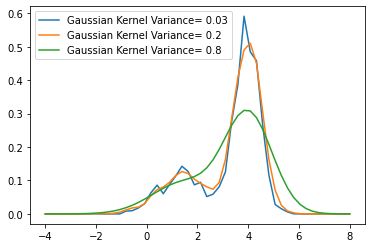

In [8]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-4,8)
h1 =[0.03 ,0.2 ,0.8]
for h in h1:
    gaussian_sum=0
    p=(len(array_from_file)*(2*np.pi*(h**2))**(1/2))
    for i in range(len(array_from_file)) :
        gaussian1=np.exp((-abs(x-(array_from_file[i]))**2)/(2*(h**2)))
        gaussian_sum=gaussian_sum+gaussian1
    gaussian_sum=gaussian_sum /p
    plt.plot(x,gaussian_sum,label="Gaussian Kernel Variance= {}".format(h))
    plt.legend()

## K-Nearest Neighbors

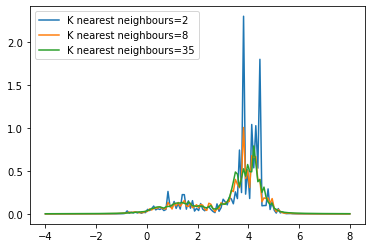

In [13]:
import numpy as np
import matplotlib.pyplot as plt
k1=[2 ,8 ,35]

for k in k1 :
    p=[]
    t=k/(2*len(array_from_file))
    x = np.linspace(-4,8,150)
    for ik in x :
        k1=[]
        for i in range(len(array_from_file)):
            k1.append(abs(ik-array_from_file[i]))
        k1.sort()
        k_smallest=k1[k]
        p.append(t/ k_smallest )
    plt.plot(x,p,label="K nearest neighbours={}".format(k))
    plt.legend()

## Expectation Maximization

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
data=np.loadtxt("gmm.txt")

In [15]:
def Try(mu, sigma,p):
    gauss1=multivariate_normal.pdf(data,mu[0],sigma[0])
    gauss2=multivariate_normal.pdf(data,mu[1],sigma[1])
    gauss3=multivariate_normal.pdf(data,mu[2],sigma[2])
    gauss4=multivariate_normal.pdf(data,mu[3],sigma[3])
    
    for c,g,p in zip(range(4),[gauss1,gauss2,gauss3,gauss4],p):
        r[:,c]=p*g
    
    for i in range(len(r)):
        r[i]=r[i]/(np.sum(p)*np.sum(r,axis=1)[i])
    m_c=[]
    
    for c in range(len(r[0])):
        m=np.sum(r[:,c])
        m_c.append(m)
    p=[]
    
    for m in m_c :
        p.append(m/np.sum(m_c))
    
    p=np.array(p)
    mu=np.dot(r.T,data)
    
    for t in range(0,4):
        mu[t,:]=mu[t,:]/m_c[t]
    
    for i in range(4):
        sigma[i,:,:] = np.dot(data.T,data*r[:,i,np.newaxis])/m_c[i]-np.outer(mu[i],mu[i].T)
    
    MLE=np.sum(np.log((np.sum(p)*np.sum(r,axis=1)[ i ])))
    return mu, sigma , p

In [19]:
r=np.empty((500,4))
mu=np.array([[2,1],[3,2],[1,0.5],[5,4]])
sigma=np.array([2*np.identity(2) ,5*np.identity(2),20*np.identity(2),10*np.identity(2)])
p=np.array([0.25 ,0.25 ,0.25 ,0.25])
for i1 in range (30):
    mu1,sigma1,p1=Try(mu,sigma,p)
    mu=mu1
    sigma=sigma1
    p=p1
x=np.linspace(-2 ,4 ,50)

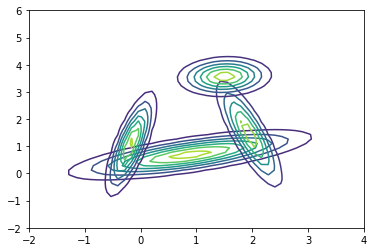

In [20]:
y = np.linspace(-2 ,6 ,50)
X , Y = np.meshgrid(x , y )
pos = np.empty(X.shape+(2,))
pos[:,:,0] = X ; pos[:,:,1] = Y
rv = multivariate_normal(mu[0] , sigma [0])
rv1 = multivariate_normal(mu[1] , sigma [1])
rv2 = multivariate_normal(mu[2] , sigma [2])
rv3 = multivariate_normal(mu[3] , sigma [3])
fig = plt.figure()
plt.contour(X,Y,rv.pdf(pos))
plt.contour(X ,Y,rv1.pdf(pos))
plt.contour(X ,Y,rv2.pdf(pos))
plt.contour(X ,Y,rv3.pdf(pos))